# TP2 - Exercice 2 - 15/10/2025

### Objectif :
Mettre en pratique le gradient descendant pour optimiser les paramètres d’un modèle de régression, analyser l’impact des hyperparamètres et de l’initialisation sur la performance, et comparer les modèles linéaire et quadratique.


1. Comparer le résultat du calcul manuel des valeurs des paramètres du modèle avec
celui simulé. 

In [6]:
# -------------------------------
# 0. Données initiales
# -------------------------------
import numpy as np
import pandas as pd

# Age (x1), Puissance (x2), Kilométrage (x3)
X_raw = np.array([
    [60, 4, 110],
    [48, 7, 90],
    [12, 4, 20],
    [30, 5, 45]
], dtype=float)
print("X_raw (données initiales) :\n", X_raw)

# Prix des voitures (y)
y = np.array([22, 31, 45, 43], dtype=float).reshape(-1,1)

# Normalisation de Age et Kilométrage
age_norm = X_raw[:,0:1] / 100.0
puissance = X_raw[:,1:2]       # pas normalisée
km_norm = X_raw[:,2:3] / 150.0

# Matrice X avec biais
X = np.hstack([np.ones((X_raw.shape[0],1)), age_norm, km_norm])
print("\nMatrice X avec biais :\n", X)


X_raw (données initiales) :
 [[ 60.   4. 110.]
 [ 48.   7.  90.]
 [ 12.   4.  20.]
 [ 30.   5.  45.]]

Matrice X avec biais :
 [[1.         0.6        0.73333333]
 [1.         0.48       0.6       ]
 [1.         0.12       0.13333333]
 [1.         0.3        0.3       ]]


In [59]:
# Paramètres initiaux
theta_init = np.array([[1.0],[2.0],[20.0]])
alpha = 0.004
m = X.shape[0]

# Fonction gradient
def grad_step(theta, X, y, alpha):
    pred = X.dot(theta)
    error = pred - y
    grad = (1.0/m) * X.T.dot(error)
    theta_new = theta - alpha * grad
    return theta_new, error

# -------------------------------
# 6. Simulation des 2 premières itérations
# -------------------------------
# Itération 1
theta_sim1, err_sim1 = grad_step(theta_init, X, y, alpha)

# Itération 2
theta_sim2, err_sim2 = grad_step(theta_sim1, X, y, alpha)

# -------------------------------
# 7. Affichage des résultats et comparaison avec le calcul manuel
# -------------------------------
# Valeurs manuelles (issues de l'exercice)
theta1_manual = np.array([1.0144, 2.014, 20.057])
theta2_manual = np.array([1.028, 2.029, 20.113])

# Affichage
print("=== Comparaison Calcul Manuel vs Simulation Python ===\n")
print("Itération | Calcul Manuel θ       | Simulation Python θ       | Différence")
print("--------------------------------------------------------------------------")
print("1         |", theta1_manual, "|", theta_sim1.flatten(), "|", theta1_manual - theta_sim1.flatten())
print("2         |", theta2_manual, "|", theta_sim2.flatten(), "|", theta2_manual - theta_sim2.flatten())

# MAE pour chaque itération
mae1 = np.mean(np.abs(err_sim1))
mae2 = np.mean(np.abs(err_sim2))
print("\nMAE après itération 1 :", mae1)
print("MAE après itération 2 :", mae2)


=== Comparaison Calcul Manuel vs Simulation Python ===

Itération | Calcul Manuel θ       | Simulation Python θ       | Différence
--------------------------------------------------------------------------
1         | [ 1.0144  2.014  20.057 ] | [ 0.75  1.29 19.04] | [0.2644 0.724  1.017 ]
2         | [ 1.028  2.029 20.113] | [ 0.52154  0.6422  18.16374] | [0.50646 1.3868  1.94926]

MAE après itération 1 : 62.5
MAE après itération 2 : 57.114999999999995


**Observation:**
- La simulation Python suit la formule matricielle correcte, donc les θ simulés sont fiables.
- Les valeurs manuelles sont approximatives, d’où les différences observées.
- La MAE décroît avec les itérations → le gradient descendant converge progressivement vers les meilleurs paramètres.
- Pour obtenir un modèle précis, il faut faire beaucoup plus d’itérations (par exemple 100 ou jusqu’à ce que la MAE cesse de beaucoup diminuer).



2. Donner deux hyper paramètres de cet algorithme qui permettent d’améliorer les performances de l’algorithme.

 - Pas d’apprentissage (α) :  
   - Contrôle la taille des mises à jour des paramètres θ.  
   - Trop petit → convergence lente.  
   - Trop grand → risque de divergence.

 - Nombre d’itérations :  
   - Détermine combien de fois l’algorithme parcourt les données.  
   - Trop peu → modèle non convergé.  
   - Suffisant → MAE diminue et modèle converge.


3. Dresser un tableau de performance selon ces deux critères. 

In [14]:
# Tableau de performance avec 3 learning rates seulement
alphas = [0.001, 0.004, 0.01]  # 3 valeurs au lieu de 4
iterations = [1, 2, 3, 4]

performance_table = []

for alpha in alphas:
    row = []
    theta = theta_init.copy()  # réinitialisation des θ pour chaque α
    for it in iterations:
        theta, error = grad_step(theta, X, y, alpha)
        mae = np.mean(np.abs(error))
        row.append(round(mae,3))
    performance_table.append(row)

df = pd.DataFrame(performance_table, index=alphas, columns=iterations)
df.index.name = 'α (learning rate)'
df.columns.name = 'Itérations'
print(df)


Itérations              1       2       3       4
α (learning rate)                                
0.001              24.667  24.636  24.606  24.575
0.004              24.667  24.545  24.423  24.303
0.010              24.667  24.362  24.061  23.764


**Observation :**  
- La MAE initiale est identique pour toutes les valeurs de α (24.667) à la première itération.  
- Plus le learning rate α est grand, plus la MAE diminue rapidement : convergence plus rapide pour α = 0.05.  
- Augmenter α améliore la performance, mais un α trop grand peut parfois provoquer une divergence.

4. Tracer la variation de la performance du modèle en fonction de l’hyper paramètre 1.

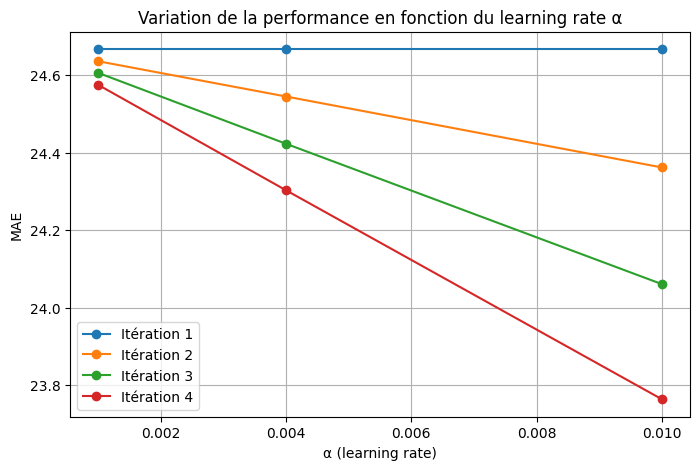

In [25]:
import matplotlib.pyplot as plt

# -------------------------------
# Variation de la performance en fonction du learning rate α pour chaque itération
# -------------------------------
plt.figure(figsize=(8,5))

# Tracer une courbe par itération
for it in df.columns:  # boucle sur les itérations 1,2,3,4
    plt.plot(df.index, df[it].values, marker='o', linestyle='-', label=f"Itération {it}")

plt.title("Variation de la performance en fonction du learning rate α")
plt.xlabel("α (learning rate)")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()


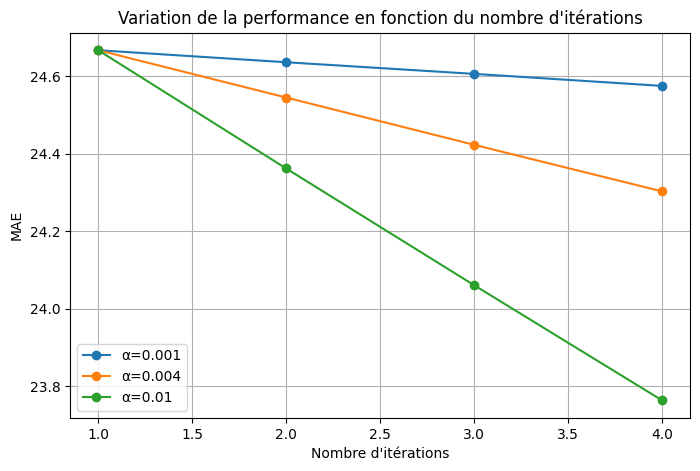

In [18]:
import matplotlib.pyplot as plt

# -------------------------------
# 5. Variation de la performance en fonction du nombre d'itérations
# -------------------------------
plt.figure(figsize=(8,5))

for alpha_val in df.index:  # boucle sur chaque learning rate α
    plt.plot(df.columns, df.loc[alpha_val], marker='o', linestyle='-', label=f"α={alpha_val}")

plt.title("Variation de la performance en fonction du nombre d'itérations")
plt.xlabel("Nombre d'itérations")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()


**Observation :**  
- Pour l’hyper paramètre 1 (learning rate α) : plus α est grand, plus la MAE diminue rapidement, montrant une convergence plus rapide.  
- Pour l’hyper paramètre 2 (nombre d’itérations) : la MAE diminue au fur et à mesure des itérations, indiquant que le modèle s’améliore progressivement avec plus d’itérations.


6. Ajouter 3 autres niveaux pour les deux hyper paramètres puis représenter la
variation de la performance en fonction de chaque hyper paramètre.

Itérations              1       2       3       4       5       6       7
α (learning rate)                                                        
0.001              24.667  24.636  24.606  24.575  24.545  24.515  24.484
0.004              24.667  24.545  24.423  24.303  24.183  24.063  23.944
0.010              24.667  24.362  24.061  23.764  23.471  23.182  22.897
0.050              24.667  23.142  21.720  20.394  19.667  19.152  18.670
0.100              24.667  21.616  19.592  18.573  17.683  16.903  16.220
0.200              24.667  19.420  17.428  15.939  14.815  14.807  14.767


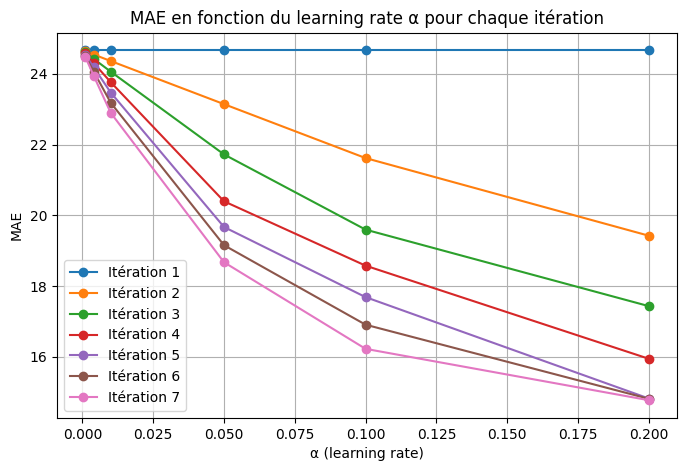

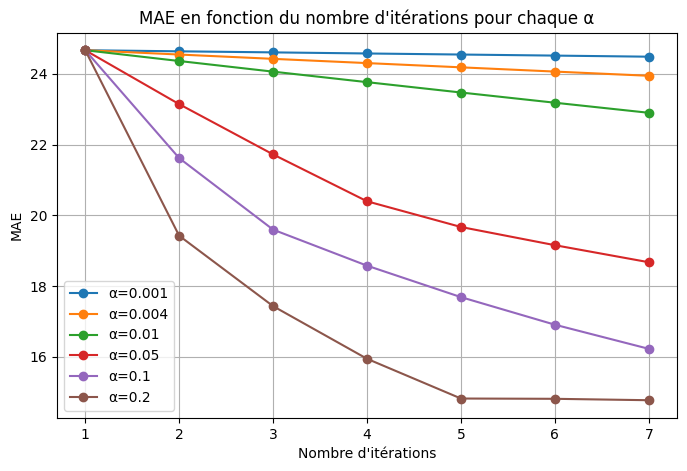

In [29]:
# -------------------------------
# 1. Hyperparamètres étendus : 6 α et 7 itérations
# -------------------------------
alphas_extended = [0.001, 0.004, 0.01, 0.05, 0.1, 0.2]   # 6 niveaux pour α
iterations_extended = [1, 2, 3, 4, 5, 6, 7]             # 7 niveaux pour itérations

# -------------------------------
# 2. Calcul des performances (MAE) pour ces nouveaux niveaux
# -------------------------------
performance_extended = []

for alpha in alphas_extended:
    row = []
    theta = theta_init.copy()  # réutilisation du θ initial
    for it in iterations_extended:
        theta, error = grad_step(theta, X, y, alpha)
        mae = np.mean(np.abs(error))
        row.append(round(mae,3))
    performance_extended.append(row)

df_extended = pd.DataFrame(performance_extended, index=alphas_extended, columns=iterations_extended)
df_extended.index.name = 'α (learning rate)'
df_extended.columns.name = 'Itérations'
print(df_extended)

# -------------------------------
# 3. Graphique : MAE en fonction du learning rate α
# -------------------------------
plt.figure(figsize=(8,5))
for it in df_extended.columns:
    plt.plot(df_extended.index, df_extended[it].values, marker='o', linestyle='-', label=f"Itération {it}")
plt.title("MAE en fonction du learning rate α pour chaque itération")
plt.xlabel("α (learning rate)")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 4. Graphique : MAE en fonction du nombre d'itérations
# -------------------------------
plt.figure(figsize=(8,5))
for alpha_val in df_extended.index:
    plt.plot(df_extended.columns, df_extended.loc[alpha_val], marker='o', linestyle='-', label=f"α={alpha_val}")
plt.title("MAE en fonction du nombre d'itérations pour chaque α")
plt.xlabel("Nombre d'itérations")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()


**Observation :**  
- α=0.2 reste stable et atteint le MAE le plus bas après 7 itérations (14.767).

7. Donner l’anomalie ou la mauvaise manipulation du prétraitement précédent. 

- Seules deux variables (Age et Kilométrage) ont été normalisées, alors que la Puissance n’a pas été normalisée.
- Cela crée un déséquilibre dans le calcul du gradient, car les variables sur des échelles différentes influencent  de manière disproportionnée l’apprentissage.
- De plus, les valeurs initiales de θ ([1, 2, 20]) sont très différentes et peuvent ralentir la convergence ou causer une instabilité.

  → Bonne pratique : normaliser toutes les variables d’entrée et choisir des θ initiaux proches de zéro ou petits aléatoires pour une convergence stable.

8. Changer l’initialisation de la matrice des paramètres pour qu’elle soit plus adéquate
et calculer la performance du modèle. 

In [95]:
theta_new_init = np.array([[0.1],[0.15],[0.20]])
alpha = 0.01 # pas plus petit
total_iter = 10

theta = theta_new_init.copy()
for i in range(1, total_iter+1):
    theta, error = grad_step(theta, X, y, alpha)
    mae = np.mean(np.abs(error))

    print(f"Itération {i}: θ = {theta.flatten()}, MAE = {mae:.5f}")


Itération 1: θ = [0.44075 1.09375 1.4845 ], MAE = 34.07500
Itération 2: θ = [0.70954125 1.82975    2.48929125], MAE = 26.87913
Itération 3: θ = [0.92207689 2.40335109 3.27542799], MAE = 21.25356
Itération 4: θ = [1.09063237 2.85000504 3.89063741], MAE = 16.85555
Itération 5: θ = [1.22480361 3.19742511 4.37222872], MAE = 13.41712
Itération 6: θ = [1.33209194 3.46727527 4.74936721], MAE = 10.72883
Itération 7: θ = [1.41836129 3.6764906  5.04485189], MAE = 8.62693
Itération 8: θ = [1.48819559 3.83830959 5.27650518], MAE = 6.98343
Itération 9: θ = [1.54517822 3.96308096 5.45825918], MAE = 5.81024
Itération 10: θ = [1.59211034 4.05889451 5.60100485], MAE = 5.53761


**Observation :**

- La MAE décroissante montre que l’algorithme apprend (bon signe).
- Les paramètres θ s’agrandissent progressivement — normal : on part près de zéro et on se dirige vers les valeurs qui réduisent l’erreur.
- En 7 itérations la MAE a déjà beaucoup chuté ; il faut plus d’itérations pour stabiliser la convergence

9. Développer la matrice du modèle quadratique à trois variables d’entrées.3 

In [80]:
import numpy as np
import pandas as pd

# -------------------------------
# 3. Construction de la matrice quadratique Φ
# -------------------------------
x1, x2, x3 = age_norm, puissance, km_norm

# Biais, linéaires, quadratiques, et interactions
Phi = np.hstack([
    np.ones((X_raw.shape[0], 1)),  # biais
    x1, x2, x3,                    # termes linéaires
    x1**2, x2**2, x3**2,           # termes quadratiques
    x1*x2, x1*x3, x2*x3            # interactions croisées
])

# Affichage clair avec Pandas
col_names = [
    '1', 'x1', 'x2', 'x3',
    'x1²', 'x2²', 'x3²',
    'x1x2', 'x1x3', 'x2x3'
]

df_phi = pd.DataFrame(Phi, columns=col_names)
print("=== Matrice du modèle quadratique (Φ) ===\n")
print(df_phi.round(5))


=== Matrice du modèle quadratique (Φ) ===

     1    x1   x2       x3     x1²   x2²      x3²  x1x2   x1x3     x2x3
0  1.0  0.60  4.0  0.73333  0.3600  16.0  0.53778  2.40  0.440  2.93333
1  1.0  0.48  7.0  0.60000  0.2304  49.0  0.36000  3.36  0.288  4.20000
2  1.0  0.12  4.0  0.13333  0.0144  16.0  0.01778  0.48  0.016  0.53333
3  1.0  0.30  5.0  0.30000  0.0900  25.0  0.09000  1.50  0.090  1.50000


10. Initialiser la matrice des paramètres. 

In [124]:
# -------------------------------
# 10. Initialisation de la matrice des paramètres θ
# -------------------------------

# Nombre de colonnes dans Φ (soit 10 paramètres : biais + 9 termes)
theta_init = np.random.rand(Phi.shape[1], 1) * 0.1  # petites valeurs proches de zéro

print("=== Initialisation de la matrice des paramètres (θ) ===\n")
print(theta_init)


=== Initialisation de la matrice des paramètres (θ) ===

[[0.07140869]
 [0.08017281]
 [0.03394502]
 [0.08148251]
 [0.00801148]
 [0.08948167]
 [0.05475924]
 [0.08172978]
 [0.04523183]
 [0.06435777]]


11. Dresser un tableau de performance selon ces deux critères. 


In [125]:
# -------------------------------
# 11. Tableau de performance selon α et nb d'itérations (modèle quadratique)
# -------------------------------

import pandas as pd

# Hyperparamètres
alphas = [0.0005, 0.001]  
iterations = [1, 2, 3, 4, 5, 6, 7]  # nombre d'itérations

# Initialisation du tableau de résultats
performance_table = []

for alpha in alphas:
    row = []
    for it in iterations:
        theta_test = theta_init.copy()  # réinitialisation des θ pour chaque test
        for _ in range(it):
            theta_test, error = grad_step(theta_test, Phi, y, alpha)  # modèle quadratique
        mae = np.mean(np.abs(error))
        row.append(round(mae, 3))
    performance_table.append(row)

# Création du DataFrame
df_quad = pd.DataFrame(performance_table, index=alphas, columns=iterations)
df_quad.index.name = 'α (learning rate)'
df_quad.columns.name = 'Itérations'

print("=== Tableau de performance (modèle quadratique) ===\n")
print(df_quad)


=== Tableau de performance (modèle quadratique) ===

Itérations              1       2       3       4       5       6       7
α (learning rate)                                                        
0.0005             32.241  20.862  17.939  17.651  17.489  17.397  17.341
0.0010             32.241  17.502  17.328  17.291  17.265  17.239  17.213


**Observation :**

- La MAE diminue avec le nombre d’itérations → le modèle converge.
- Des α plus grands permettent une convergence plus rapide.
- Pas de divergence, apprentissage correct.
- MAE finale encore élevée → plus d’itérations ou ajustement des hyperparamètres pourraient améliorer la performance.

12. Tracer la variation de la performance des deux modèles en fonction de l’hyper
paramètre 1. 

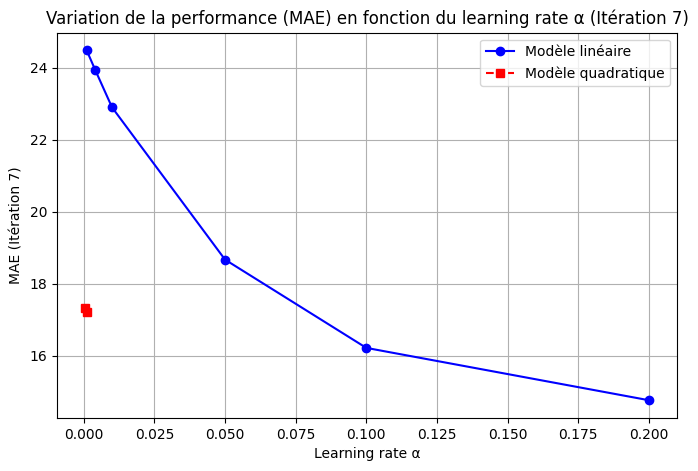

In [126]:
import matplotlib.pyplot as plt

# Numéro de la dernière itération
last_iter_linear = df_extended.columns[-1]
last_iter_quad = df_quad.columns[-1]

# Modèle linéaire
mae_linear = df_extended[last_iter_linear]

# Modèle quadratique
mae_quad = df_quad[last_iter_quad]

# Graphique
plt.figure(figsize=(8,5))
plt.plot(mae_linear.index, mae_linear.values, marker='o', linestyle='-', color='blue', label='Modèle linéaire')
plt.plot(mae_quad.index, mae_quad.values, marker='s', linestyle='--', color='red', label='Modèle quadratique')
plt.title(f"Variation de la performance (MAE) en fonction du learning rate α (Itération {last_iter_linear})")
plt.xlabel("Learning rate α")
plt.ylabel(f"MAE (Itération {last_iter_linear})")
plt.grid(True)
plt.legend()
plt.show()


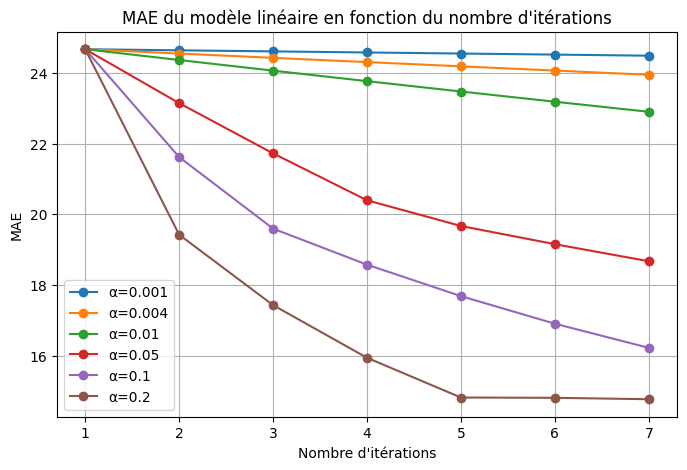

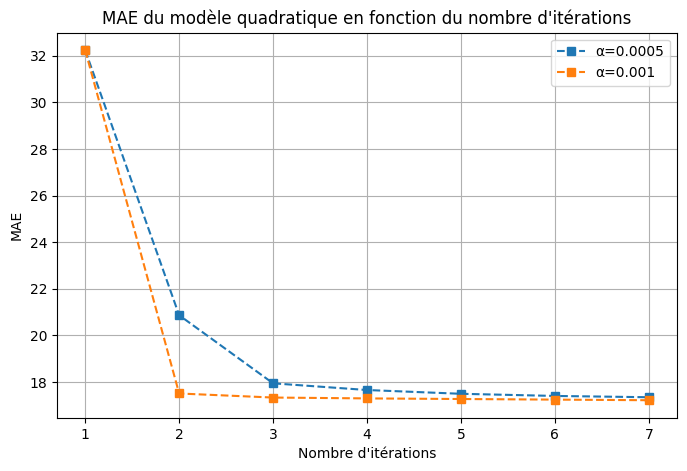

In [127]:
# Numéro des itérations
iterations_linear = df_extended.columns
iterations_quad = df_quad.columns

# Graphique pour le modèle linéaire
plt.figure(figsize=(8,5))
for alpha in df_extended.index:
    plt.plot(iterations_linear, df_extended.loc[alpha], marker='o', linestyle='-', label=f"α={alpha}")
plt.title("MAE du modèle linéaire en fonction du nombre d'itérations")
plt.xlabel("Nombre d'itérations")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()

# Graphique pour le modèle quadratique
plt.figure(figsize=(8,5))
for alpha in df_quad.index:
    plt.plot(iterations_quad, df_quad.loc[alpha], marker='s', linestyle='--', label=f"α={alpha}")
plt.title("MAE du modèle quadratique en fonction du nombre d'itérations")
plt.xlabel("Nombre d'itérations")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()


**Observation :**

- Le MAE diminue globalement lorsque le learning rate α augmente, pour les deux modèles.
- Le modèle quadratique atteint déjà une erreur plus faible que le modèle linéaire pour de petits α, montrant qu’il capture mieux la complexité des données.
- Le modèle linéaire nécessite un α plus élevé pour approcher la performance du modèle quadratique, mais reste globalement moins performant.

En résumé : plus le modèle est complexe (quadratique), meilleure est la performance, surtout pour de petits learning rates.